# Medical diagnosis with Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('survey lung cancer.csv')

In [6]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Transforming the Data

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['GENDER']=le.fit_transform(data['GENDER'])
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [9]:
data['LUNG_CANCER']=le.fit_transform(data['LUNG_CANCER'])
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


<Axes: xlabel='LUNG_CANCER', ylabel='count'>

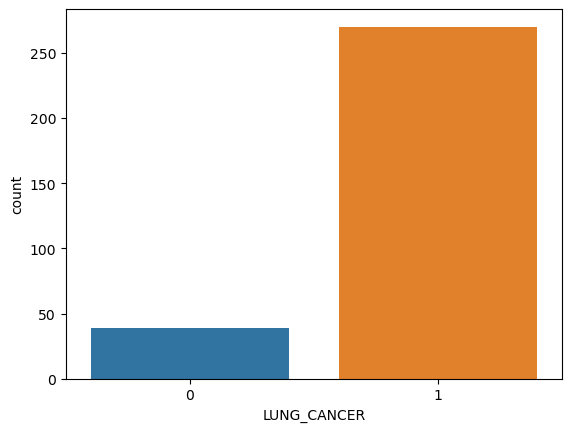

In [10]:
sns.countplot(data,x='LUNG_CANCER')

In [11]:
data.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [12]:
x=data.iloc[:,:-1]
x.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [13]:
y=data.iloc[:,-1:]
y.head()

,LUNG_CANCER
0,1
1,1
2,0
3,0
4,0


# Gaussian Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
print('Training Data Shape')
print()
print('Training data-X- shape:\t',xtrain.shape)
print()
print('Training data-Y- shape:\t',ytrain.shape)
print()
print('Testing Data Shape')
print()
print('Testing data(X-Input) shape:\t',xtest.shape)
print()
print('Testing data(Y-Input) shape:\t',ytest.shape)

Training Data Shape

Training data-X- shape:	 (247, 15)

Training data-Y- shape:	 (247, 1)

Testing Data Shape

Testing data(X-Input) shape:	 (62, 15)

Testing data(Y-Input) shape:	 (62, 1)


In [25]:
bayes_model=GaussianNB()
print('***Naive Bayes Gaussian********')
print('Training Phase\n')
bayes_model. fit (xtrain, ytrain)
print('Training is completed')
print('*'*100)
print()
print('Testing Phase\n')
ypred=bayes_model.predict(xtest)
print('Prdicted Class Labels are: \n',ypred)
print('Test is also done')
print()
print('*'*100)

***Naive Bayes Gaussian********
Training Phase

Training is completed
****************************************************************************************************

Testing Phase

Prdicted Class Labels are: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
Test is also done

****************************************************************************************************


C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification report :\n',classification_report(ytest,ypred))

Accuracy Score:	 0.9516129032258065

Confusion Matrix:
 [[ 1  1]
 [ 2 58]]

Classification report :
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62



array([[<Axes: title={'center': 'GENDER'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'SMOKING'}>,
        <Axes: title={'center': 'YELLOW_FINGERS'}>],
       [<Axes: title={'center': 'ANXIETY'}>,
        <Axes: title={'center': 'PEER_PRESSURE'}>,
        <Axes: title={'center': 'CHRONIC DISEASE'}>,
        <Axes: title={'center': 'FATIGUE '}>],
       [<Axes: title={'center': 'ALLERGY '}>,
        <Axes: title={'center': 'WHEEZING'}>,
        <Axes: title={'center': 'ALCOHOL CONSUMING'}>,
        <Axes: title={'center': 'COUGHING'}>],
       [<Axes: title={'center': 'SHORTNESS OF BREATH'}>,
        <Axes: title={'center': 'SWALLOWING DIFFICULTY'}>,
        <Axes: title={'center': 'CHEST PAIN'}>,
        <Axes: title={'center': 'LUNG_CANCER'}>]], dtype=object)

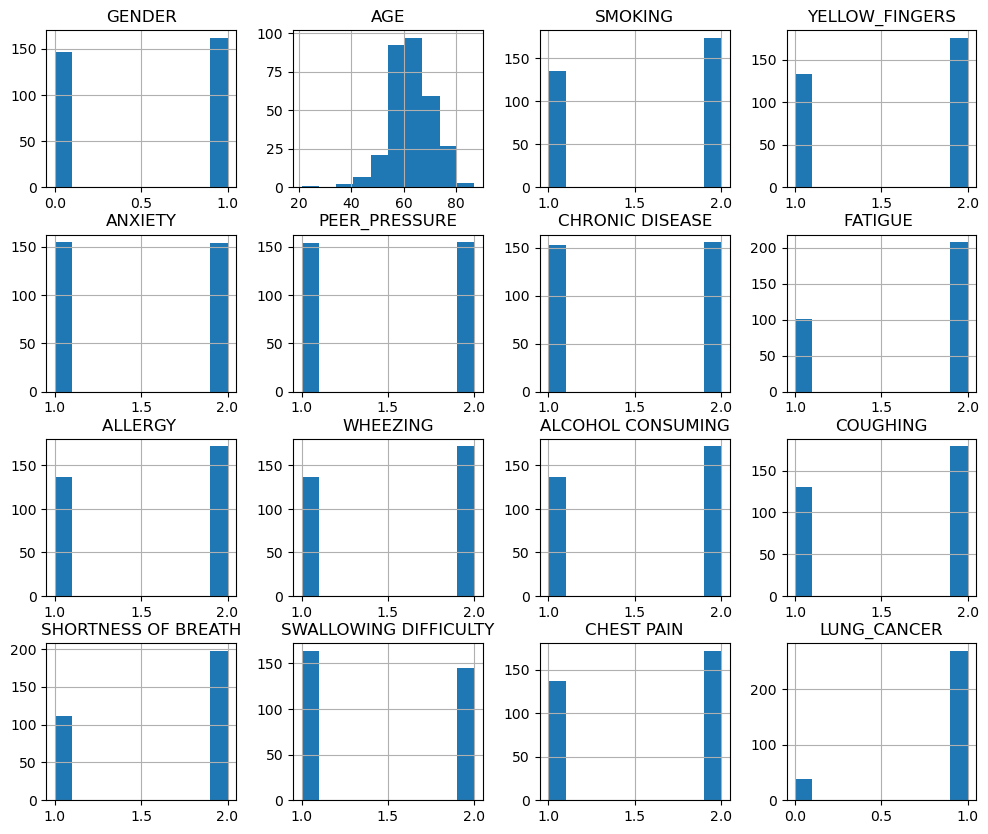

In [27]:
data.hist(figsize=(12,10))

# Multinomial Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB
bayes_model=MultinomialNB()
print('***Naive Bayes Multinomial********')
print('Training Phase\n')
bayes_model. fit (xtrain, ytrain)
print('Training is completed')
print('*'*100)
print()
print('Testing Phase\n')
ypred=bayes_model.predict(xtest)
print('Prdicted Class Labels are: \n',ypred)
print('Test is also done')
print()
print('*'*100)

***Naive Bayes Multinomial********
Training Phase

Training is completed
****************************************************************************************************

Testing Phase

Prdicted Class Labels are: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Test is also done

****************************************************************************************************


C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification report :\n',classification_report(ytest,ypred))

Accuracy Score:	 0.967741935483871

Confusion Matrix:
 [[ 0  2]
 [ 0 60]]

Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      1.00      0.98        60

    accuracy                           0.97        62
   macro avg       0.48      0.50      0.49        62
weighted avg       0.94      0.97      0.95        62



C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Bernoulli Naive Bayes

In [30]:
from sklearn.naive_bayes import BernoulliNB
bayes_model=BernoulliNB()
print('***Naive Bayes Bernoulli********')
print('Training Phase\n')
bayes_model. fit (xtrain, ytrain)
print('Training is completed')
print('*'*100)
print()
print('Testing Phase\n')
ypred=bayes_model.predict(xtest)
print('Prdicted Class Labels are: \n',ypred)
print('Test is also done')
print()
print('*'*100)

***Naive Bayes Bernoulli********
Training Phase

Training is completed
****************************************************************************************************

Testing Phase

Prdicted Class Labels are: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Test is also done

****************************************************************************************************


C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification report :\n',classification_report(ytest,ypred))

Accuracy Score:	 0.967741935483871

Confusion Matrix:
 [[ 0  2]
 [ 0 60]]

Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      1.00      0.98        60

    accuracy                           0.97        62
   macro avg       0.48      0.50      0.49        62
weighted avg       0.94      0.97      0.95        62



C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
